#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

#### Get essentials

Import text and graph modules for analysis, and css for display

In [1]:
from dhlab.module_update import update, css

D:\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
css()

In [3]:
import requests
def ner(text = None):
    r = []
    if text != None:
        r = requests.post("https://api.nb.no/ngram/ner", json={'text':text})
    return r.json()
    

In [6]:
import dhlab.nbtext as nb

In [7]:
import imp
imp.reload(nb)

<module 'dhlab.nbtext' from 'D:\\Anaconda3\\lib\\site-packages\\dhlab\\nbtext.py'>

In [8]:
nb??

In [8]:
import nbtext as nb
from nbtext import ner

In [9]:
nb.ner("""Det sier Henrik Urdal, direktør ved Fredsforskningsinstituttet Prio, og tidligere redaktør for Journal of Peace Research, det kanskje mest prestisjefylte vitenskapelige tidsskriftet med base i Norge. Forrige uke avdekket Morgenbladet at det norske «tellekantsystemet» godkjenner mer enn 60 tidsskrifter som er klassifisert som røvertidsskrifter (predatory journals) i en svarteliste hos selskapet Cabells Scholarly Analytics. Her henviste flere til det norske Kanalregisteret som en garantist for at tidsskriftene var gode nok. 

Urdal sier imidlertid det er «skjødesløst» av forskere ikke selv å undersøke kvaliteten på publikasjonene man velger å benytte.

– Det overrasker meg hvor lett man tar på det, sier Urdal, som mener kriteriene til Cabells peker på helt grunnleggende ting som må være på plass i et tidsskrift som vil bli tatt seriøst.""", dist= False)

['Det',
 'sier',
 ['Henrik Urdal', 'person'],
 ',',
 'direktør',
 'ved',
 ['Fredsforskningsinstituttet Prio', 'sted'],
 ',',
 'og',
 'tidligere',
 'redaktør',
 'for',
 ['Journal', 'sted'],
 'of',
 ['Peace Research', 'sted'],
 ',',
 'det',
 'kanskje',
 'mest',
 'prestisjefylte',
 'vitenskapelige',
 'tidsskriftet',
 'med',
 'base',
 'i',
 ['Norge', 'sted'],
 '.',
 ['Forrige', 'person'],
 'uke',
 'avdekket',
 ['Morgenbladet', 'person'],
 'at',
 'det',
 'norske',
 '«',
 'tellekantsystemet',
 '»',
 'godkjenner',
 'mer',
 'enn',
 '60',
 'tidsskrifter',
 'som',
 'er',
 'klassifisert',
 'som',
 'røvertidsskrifter',
 '(',
 'predatory',
 'journals',
 ')',
 'i',
 'en',
 'svarteliste',
 'hos',
 'selskapet',
 ['Cabells Scholarly Analytics', 'sted'],
 '.',
 'Her',
 'henviste',
 'flere',
 'til',
 'det',
 'norske',
 ['Kanalregisteret', 'person'],
 'som',
 'en',
 'garantist',
 'for',
 'at',
 'tidsskriftene',
 'var',
 'gode',
 'nok',
 '.',
 ['Urdal', 'person'],
 'sier',
 'imidlertid',
 'det',
 'er',
 '«

# Ellen - analyse av Pan

Her har du selve notebooken som henter ut navn og lager graf.

### Start med å importere modulene

In [10]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file `D:\Documents\GitHub\Mining_the_digital_bookshelf\Ellen Rees\graph_networkx_louvain.py`

In [11]:
def genitives(G):
    pairs = []
    for i in G.nodes():
        if i+'s' in G.nodes():
            pairs.append((i, i+'s'))
    return pairs

def genitives_in_list(G):
    gens = []
    for i in G:
        if i+'s' in G:
            gens.append(i+'s')
    return gens

## Bygg korpus og analysér

Hent URN-er fra tekst eller metadata

In [12]:
korpus = nb.get_urn({'author':'hamsun%', 'title':'%pan%'})

In [13]:
korpus

[[2008020804093, 'Hamsun, Knut', 'Pan', 1994],
 [2008051404107, 'Hamsun, Knut', 'Pan', 1954],
 [2008010200016, 'Hamsun, Knut', 'Pan', 1994],
 [2008020604049, 'Hamsun, Knut', 'Pan', 1994],
 [2016053048123, 'Hamsun, Knut', 'Pan', 1919],
 [2011112308061, 'Hamsun, Knut', 'Pan', 1954],
 [2011112108059, 'Hamsun, Knut', 'Pan', 1954],
 [2016060348116, 'Hamsun, Knut', 'Pan', 1974],
 [2008082701033, 'Hamsun, Knut', 'Pan', 1998],
 [2008121004041, 'Hamsun, Knut', 'Pan', 1968]]

In [14]:
bok =  [2008121004041, 'Hamsun, Knut', 'Pan', 1968]


## Analyse

Hent ut mulige navn fra boken

In [15]:
boknavn = nb.navn(bok)

In [16]:
genitives = genitives_in_list(boknavn)

En liste med ord som heuristikken over kan ta med som navn men som vi fjerner

In [17]:
stopnavn = ['Nordland', 'Undskyld','Goddag','Thomas','Cora', 'Sirilund', 'Knut', 'Hamsun', 'Indien', 'Korholmerne','Gud','Guds', 'Ja', 'Nei', 'Nå', 'Dem', 'De', 'Deres', 'Unnskyld', 'Ikke', 'Ah', 'Hmm', 'Jaså', 'Eder', 'Pause', 'Pan']

In [18]:
stopnavn += genitives

Her skjer fjerningen

In [19]:
boknavncheck = nb.check_navn(boknavn, limit=2, remove=stopnavn)

In [20]:
boknavncheck

{'Diderik': 7,
 'Dundas': 5,
 'Edvarda': 129,
 'Eva': 75,
 'Glahn': 80,
 'Henriette': 3,
 'Iselin': 13,
 'Mack': 48,
 'Maggie': 26,
 'Stener': 3,
 'Æsop': 61}

In [21]:
nb.get_urnkonk('Henriette', {'urns':bok, 'size':50})

Parameter urns missing


"Pan, Hamsun, Knut, 1968",og sa at hun het,Henriette,.
"Pan, Hamsun, Knut, 1968","Har du en kjæreste ,",Henriette,", og har han nogen"
"Pan, Hamsun, Knut, 1968",dig . Du heter forresten,Henriette,.


In [22]:
boknavncheck['doktoren'] = 1
boknavncheck['løitnant'] = 1
boknavncheck['løytnant'] = 1
#boknavncheck['Henriette'] = 1
boknavncheck['smeden'] = 1
#boknavncheck['jeg'] = 1

Så lages grafen

In [23]:
navnegraf = nb.make_network_graph(bok[0], boknavncheck)

In [24]:
boknavncheck

{'Diderik': 7,
 'Dundas': 5,
 'Edvarda': 129,
 'Eva': 75,
 'Glahn': 80,
 'Henriette': 3,
 'Iselin': 13,
 'Mack': 48,
 'Maggie': 26,
 'Stener': 3,
 'Æsop': 61,
 'doktoren': 1,
 'løitnant': 1,
 'løytnant': 1,
 'smeden': 1}

visualisering

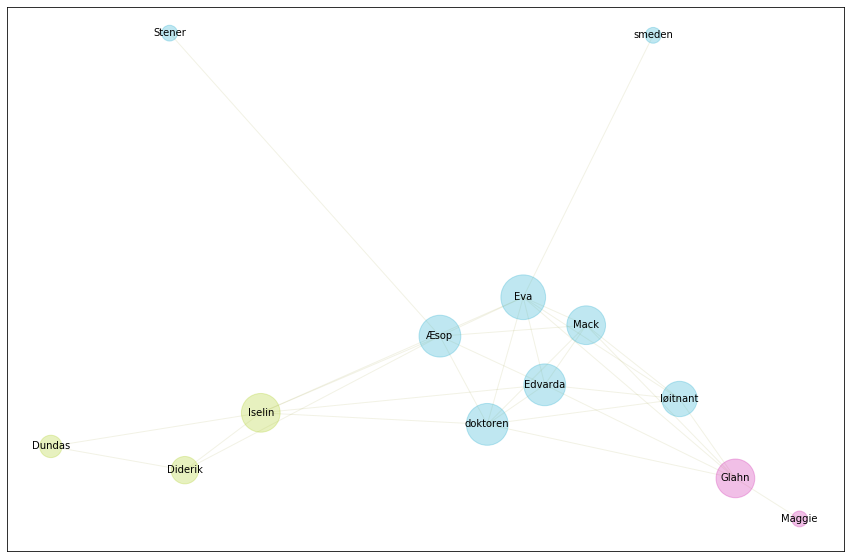

In [25]:
gnl.show_graph(navnegraf)

Clustring slik fargene viser

In [26]:
gnl.show_community(navnegraf)

1 Diderik, Dundas, Iselin

2 Mack, doktoren, løitnant, Eva, Edvarda, smeden, Stener, Æsop

3 Maggie, Glahn



True

Se litt på hva statistikken viser

In [27]:
dict(nb.central_betweenness_characters(navnegraf, n=10))

{'Æsop': 0.247943722943723,
 'Eva': 0.2395021645021645,
 'Iselin': 0.1831168831168831,
 'Glahn': 0.16666666666666669,
 'Edvarda': 0.07283549783549784,
 'doktoren': 0.07283549783549784,
 'Mack': 0.029220779220779224,
 'Diderik': 0.01818181818181818,
 'Dundas': 0.0,
 'løitnant': 0.0}

In [28]:
dict(nb.central_characters(navnegraf, n=10))

{'Eva': 0.6666666666666666,
 'Æsop': 0.5833333333333333,
 'Edvarda': 0.5833333333333333,
 'doktoren': 0.5833333333333333,
 'Iselin': 0.5,
 'Glahn': 0.5,
 'Mack': 0.5,
 'løitnant': 0.41666666666666663,
 'Diderik': 0.25,
 'Dundas': 0.16666666666666666}

Lager en subgraf basert på vekting av buene i grafen

In [29]:
graphs = []
for i in range(len(korpus)):
    graphs.append(nb.make_network_graph(korpus[i][0], boknavncheck))

In [30]:
print(nb.metadata(korpus[0]))
gnl.show_graph(graphs[0])

ValueError: invalid literal for int() with base 10: 'Hamsun, Knut'

In [31]:
print(nb.metadata(korpus[1]))
gnl.show_graph(graphs[1])

ValueError: invalid literal for int() with base 10: 'Hamsun, Knut'

In [ ]:
print(nb.metadata(korpus[2]))
gnl.show_graph(graphs[2])

In [ ]:
print(nb.metadata(korpus[3]))
gnl.show_graph(graphs[3])

In [ ]:
print(nb.metadata(korpus[4]))
gnl.show_graph(graphs[4])

In [ ]:
print(nb.metadata(korpus[5]))
gnl.show_graph(graphs[5])

In [ ]:
print(nb.metadata(korpus[6]))
gnl.show_graph(graphs[6])

In [ ]:
print(nb.metadata(korpus[7]))
gnl.show_graph(graphs[7])

In [ ]:
print(nb.metadata(korpus[8]))
gnl.show_graph(graphs[8])

In [ ]:
print(nb.metadata(korpus[9]))
gnl.show_graph(graphs[9])

In [ ]:
print(nb.metadata(korpus[10]))
gnl.show_graph(graphs[10])

In [ ]:
[edge for edge in navnegraf.edges(data=True) if edge[2]['weight'] > 0]

In [ ]:
subedge = [(edge[0], edge[1]) for edge in navnegraf.edges(data=True) if edge[2]['weight'] > 5]

In [ ]:
gnl.show_graph(navnegraf.edge_subgraph(subedge))

In [ ]:
nb.central_betweenness_characters(navnegraf.edge_subgraph(subedge))

In [ ]:
nb.central_characters(navnegraf.edge_subgraph(subedge))

In [ ]:
dgen = dict(genitives(navnegraf_r))
dgen

In [ ]:
import networkx as nx

In [ ]:
def contracted_nodes(G, u, v, self_loops=True):
    """Returns the graph that results from contracting `u` and `v`.
    Node contraction identifies the two nodes as a single node incident to any
    edge that was incident to the original two nodes.
    Parameters
    ----------
    G : NetworkX graph
       The graph whose nodes will be contracted.
    u, v : nodes
       Must be nodes in `G`.
    self_loops : Boolean
       If this is True, any edges joining `u` and `v` in `G` become
       self-loops on the new node in the returned graph.
    Returns
    -------
    Networkx graph
       A new graph object of the same type as `G` (leaving `G` unmodified)
       with `u` and `v` identified in a single node. The right node `v`
       will be merged into the node `u`, so only `u` will appear in the
       returned graph.
    Examples
    --------
    Contracting two nonadjacent nodes of the cycle graph on four nodes `C_4`
    yields the path graph (ignoring parallel edges)::
        >>> import networkx as nx
        >>> G = nx.cycle_graph(4)
        >>> M = nx.contracted_nodes(G, 1, 3)
        >>> P3 = nx.path_graph(3)
        >>> nx.is_isomorphic(M, P3)
        True
    See also
    --------
    contracted_edge
    quotient_graph
    Notes
    -----
    This function is also available as `identified_nodes`.
    """

    H = G.copy()
    if H.is_directed():
        in_edges = ((w, u, d) for w, x, d in G.in_edges(v, data=True)
                    if self_loops or w != u)
        out_edges = ((u, w, d) for x, w, d in G.out_edges(v, data=True)
                     if self_loops or w != u)
        new_edges = chain(in_edges, out_edges)
    else:
        # new_edges = ((u, w, d) for x, w, d in G.edges(v, data=True)
        #              if self_loops or w != u)
        # new_edges = ((u, w, d) for x, w, d in G.edges(v, data=True)
        # if self_loops or w != u)
        new_edges = list()
        nodes_u = [w for x, w in G.edges(u)]
        for x, w, d in G.edges(v, data=True):
            if w != u:
                if w not in nodes_u:
                    new_edges.append((u, w, d))
                else:
                    max_d = max(d, G[u][w])
                    new_edges.append((u, w, max_d))
    v_data = H.node[v]
    pdb.set_trace()
    H.remove_node(v)
    H.add_edges_from(new_edges)
    if 'contraction' in H.node[u]:
        H.node[u]['contraction'][v] = v_data
    else:
        H.node[u]['contraction'] = {v: v_data}
    return H


In [ ]:
G = navnegraf_r
for p in genitives(navnegraf):
    G = nx.contracted_nodes(G, p[0], p[1])
navnegraf = G
for (x,y) in navnegraf

In [ ]:
navnegraf.edges(data=True)

In [ ]:
navnegraf_r.edges(data=True)